# Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

# Part I Review the online programming. 

# Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implement the gradient descent code.

In [18]:
def loss(y,y_hat):
    return sum([abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))])/len(list(y))

# loss([1,2,3],[3,2,1])

def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            gradient += -1*x_i
        if y_i < y_hat_i:
            gradient += x_i
    return 1/n*gradient

def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            gradient += -1
        if y_i < y_hat_i:
            gradient += 1
    return 1/n*gradient
            
def price(x,k,b):
    return k*x+b

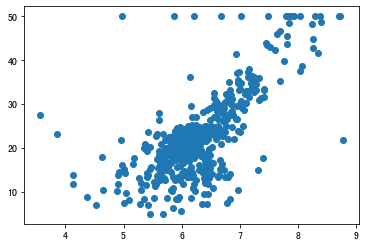

In [4]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data['data'], data['target']
%matplotlib inline
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
draw_rm_and_price()

In [20]:
import random
trying_times = 2000
learning_rate = 0.001
X_rm = X[:,5]
min_loss = float('inf')
current_k = random.random()*200-100
current_b = random.random()*200-100
for i in range(trying_times):
    y_hat = [price(x_i,current_k,current_b) for x_i in X_rm]
    current_loss = loss(y,y_hat)
    k_gradient = partial_k(X_rm,y,y_hat)
    b_gradient = partial_b(X_rm,y,y_hat)
    
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
            
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_k = current_k + (-1 * k_gradient) * learning_rate
    

When time is : 0, get best_k: 49.05245534809157 best_b: -85.01776335640325, and the loss is: 200.72617798414012
When time is : 50, get best_k: 48.42399190935669 best_b: -85.01776335640325, and the loss is: 196.77651504587323
When time is : 100, get best_k: 47.795528470621804 best_b: -85.01776335640325, and the loss is: 192.8268521076071
When time is : 150, get best_k: 47.16706503188692 best_b: -85.01776335640325, and the loss is: 188.87718916934028
When time is : 200, get best_k: 46.53860159315204 best_b: -85.01776335640325, and the loss is: 184.9275262310736
When time is : 250, get best_k: 45.910138154417155 best_b: -85.01776335640325, and the loss is: 180.97786329280706
When time is : 300, get best_k: 45.28167471568227 best_b: -85.01776335640325, and the loss is: 177.0282003545405
When time is : 350, get best_k: 44.65321127694739 best_b: -85.01776335640325, and the loss is: 173.07853741627372
When time is : 400, get best_k: 44.024747838212505 best_b: -85.01776335640325, and the loss 

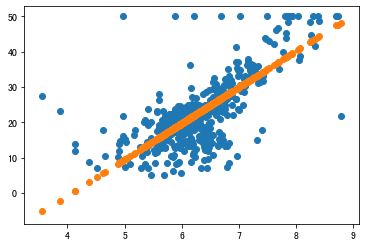

In [21]:
k = 24.57464297655765
b = -85.01776335640325
price_by_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)

# Part 3: Finish the Solution Parse Part of Edit-Distance

In [5]:
from functools import lru_cache
solution = {}
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation
    return min_distance

In [6]:
# edit_distance('biejing','beijing')
edit_distance('ABCDE', 'ABCCEF')

2

In [9]:
def op(s1,s2,operation):
    if operation == 'DEL':
        return (s1[:-1],s2,"DEL string1's last word:{},{}->{},{}".format(s1,s2,s1[:-1],s2))
    if operation == 'ADD':
        return (s1,s2[:-1],"DEL string2's last word:{},{}->{},{}".format(s1,s2,s1,s2[:-1]))
    else:
        return (s1[:-1],s2[:-1],"DEL string1 and string2's last word:{},{}->{},{}".format(s1,s2,s1[:-1],s2[:-1]))
def parse_solution(s1,s2,solution):
    steps = []
    while s1 or s2:
        result = solution[(s1,s2)]
        if result == '':operation = ''
        else:operation = result.split()[0]
        s1,s2,message = op(s1,s2,operation)
        steps.append(message)
    return steps

In [10]:
# parse_solution('biejing','beijing',solution)
parse_solution('ABCDE', 'ABCCEF',solution)

["DEL string2's last word:ABCDE,ABCCEF->ABCDE,ABCCE",
 "DEL string1 and string2's last word:ABCDE,ABCCE->ABCD,ABCC",
 "DEL string1 and string2's last word:ABCD,ABCC->ABC,ABC",
 "DEL string1 and string2's last word:ABC,ABC->AB,AB",
 "DEL string1 and string2's last word:AB,AB->A,A",
 "DEL string1 and string2's last word:A,A->,"]

# Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

# Part 5-1: review machine learning

1. Why do we use Derivative / gradient to fit a target function?¶

Ans:可以更快地找到极值点

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度指损失函数梯度，对每一个权重求偏导；下降指梯度的反方向，使得损失函数的值最快减小


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:损失函数的值减小的最快

4. Using the simple words to describe: What's the machine leanring.¶

Ans:根据给定的数据，让计算机计算出其中的规律。

# Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:最短路径、投资分配、背包问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:
单词纠错

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:
1. 将问题分解为子问题，用递归来实现子问题
2. 用表来保存已经求结果的子问题的解
3. 最优解可以通过保存的表来计算出

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

# Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

# (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

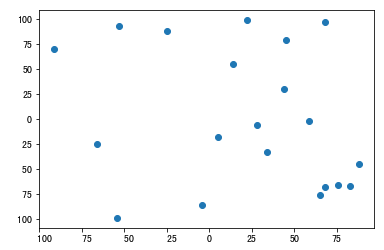

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

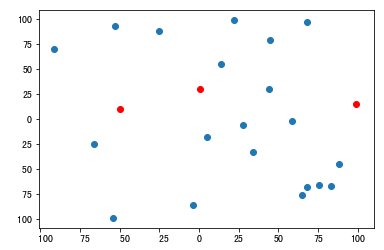

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro